In [76]:
#import các thu viện cần sử dụng
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression #import model
from sklearn.model_selection import train_test_split #import model trainning
from sklearn.metrics import mean_squared_error #import model tính chỉ số của mô hình
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [43]:
#đọc dữ liệu từ csv
data_path = 'Data_Predict.csv'
df = pd.read_csv(data_path)

In [44]:
#kiểm tra thông tin dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56046 entries, 0 to 56045
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   OrderDate              56046 non-null  object 
 1   StockDate              56046 non-null  object 
 2   OrderNumber            56046 non-null  object 
 3   ProductKey             56046 non-null  int64  
 4   CustomerKey            56046 non-null  int64  
 5   TerritoryKey           56046 non-null  int64  
 6   OrderLineItem          56046 non-null  int64  
 7   OrderQuantity          56046 non-null  int64  
 8   ProductSubcategoryKey  56046 non-null  int64  
 9   ProductSKU             56046 non-null  object 
 10  ModelName              56046 non-null  object 
 11  ProductColor           29168 non-null  object 
 12  ProductSize            56046 non-null  object 
 13  ProductStyle           56046 non-null  object 
 14  ProductCost            56046 non-null  float64
 15  Pr

In [45]:
#đổi kiểu dữ liệu từ object sang datetime
df['OrderDate'] = df['OrderDate'].astype('datetime64[s]')

In [46]:
#sắp xếp theo orderdate tăng dần
df.sort_values(by='OrderDate', inplace=True)

In [47]:
#Tạo độ trễ cho Model
# Tạo cột Lag_1 (giá trị của ngày hôm trước)
df['Lag_1'] = df['TotalRevenue'].shift(1)

# Loại bỏ các hàng chứa giá trị NaN (do tạo độ trễ)
df.dropna(inplace=True)

In [ ]:
#Chia dữ liệu thành tập huấn luyện và kiểm tra
# Chọn cột Lag_1 làm đặc trưng và Sales làm mục tiêu
X = df[['Lag_1']]  # Đặc trưng
y = df['TotalRevenue']    # Mục tiêu

# Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
#Huấn luyện mô hình và dự đoán
# Khởi tạo mô hình
model = LinearRegression()

# Huấn luyện
model.fit(X_train, y_train)

# Dự đoán
y_pred = model.predict(X_test)

# Đánh giá mô hình
# Tính R^2
r2 = r2_score(y_test, y_pred)
print("R^2:", r2)

#Tính MSE
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Tính MAE
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)
#Tính RMSE
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

R^2: 0.14205356045154938
Mean Squared Error: 863071.1888034177
Mean Absolute Error (MAE): 793.1707850574686
Root Mean Squared Error (RMSE): 929.0162478683662


In [57]:
#Dự báo giá trị tiếp theo
# Lấy giá trị cuối cùng làm độ trễ
last_value = df['TotalRevenue'].iloc[-1]

# Tạo DataFrame đầu vào với tên cột
input_data = pd.DataFrame({'Lag_1': [last_value]})  # 'Lag_1' là tên cột trong mô hình

# Dự đoán giá trị tiếp theo
next_prediction = model.predict(input_data)
print("Dự báo giá trị tiếp theo:", next_prediction[0])

Dự báo giá trị tiếp theo: 612.5616104002528


In [58]:
last_value

np.float64(63.5)

In [59]:
input_data

,Lag_1
0,63.5


In [60]:
import matplotlib.pyplot as plt

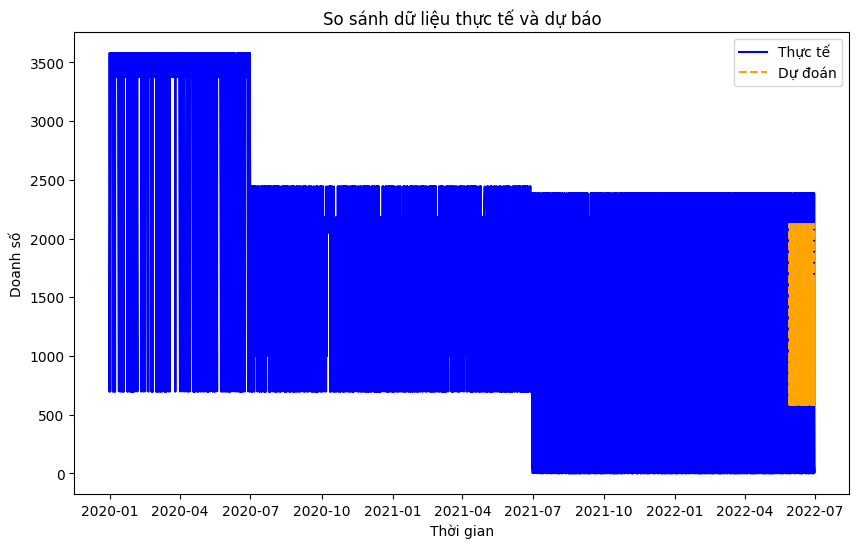

In [71]:
# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.plot(df['OrderDate'], df['TotalRevenue'], label="Thực tế", color="blue")
plt.plot(df['OrderDate'].iloc[-len(y_test):], y_pred, label="Dự đoán", color="orange", linestyle="--")
plt.xlabel("Thời gian")
plt.ylabel("Doanh số")
plt.title("So sánh dữ liệu thực tế và dự báo")
plt.legend()
plt.show()